In [9]:
import json

# Define the paths to the files for easier access
file_paths = [
"/home/peiman/projects/RayInference/logs/multiActor/algo/experiment_results_HashBasedSelection_20240419-163329.json",
"/home/peiman/projects/RayInference/logs/multiActor/algo/experiment_results_RandomSelection_20240419-163138.json",
"/home/peiman/projects/RayInference/logs/multiActor/algo/experiment_results_RoundRobinSelection_20240419-162943.json"
]
algo_names = ["HashBasedSelection", "RandomSelection", "RoundRobinSelection"]

# Load all the data from the JSON files into a list of dictionaries
experiment_data = []
for path in file_paths:
    with open(path, 'r') as file:
        data = json.load(file)
        experiment_data.append(data)

# Print to verify the loaded data
experiment_data[0]  # Show the first entry to check structure


{'/home/peiman/projects/RayInference/unique_labeled_prompts.csv': [{'batch_size': 4,
   'total_time': 51.73112940788269,
   'results': [{'generated_text': [{'0': "How to unclog a toilet.\n\nHere's what you need:\n\nA toilet can look a lot like a garden. It's a water-tight, hard surface that absorbs water. It protects both the hands and feet against decay",
       '1': "What happened in 1995?Still, many experts worry about what happened then.\n\nWhile it's no doubt true — the United States had the largest black population in the entire world at one point in time — it was not one of the",
       '2': "Who is George Hankins?1 If you've been reading and thinking about this comic, you've now been saved from a very very unpleasant situation. As we learn in our first encounter with Dr. Hankins and the Human Torch, they're",
       '3': 'What is Housing First?On June 13, a federal judge in Minnesota ruled that private housing was an unconstitutional and unconstitutional law "that may be null a

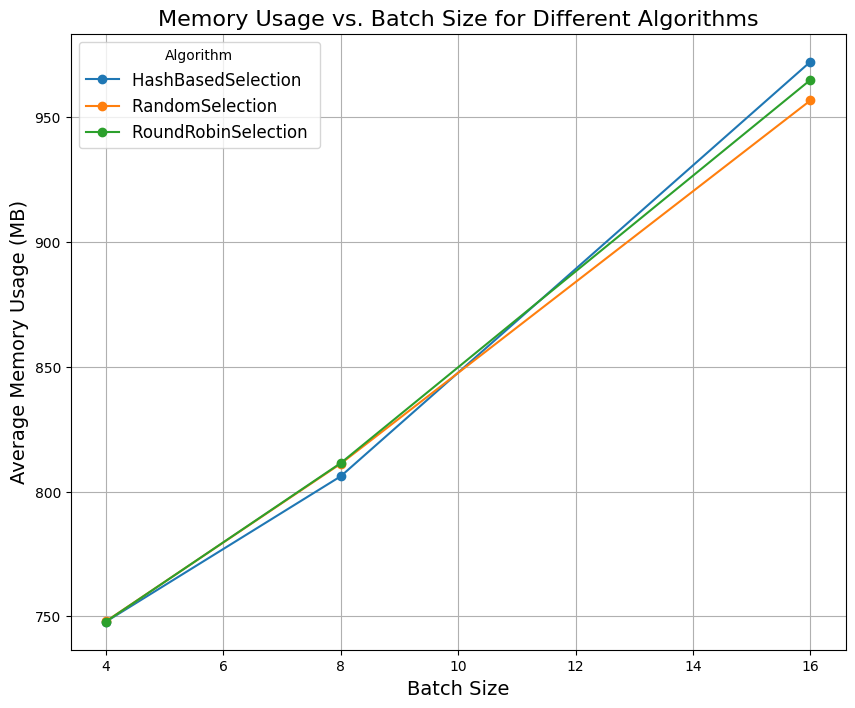

In [10]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
algo_data = {}
for i, data in enumerate(experiment_data, start=1):
    algo_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        memory_usage = [result['batch_info'][0]['memory_used'] for result in entry['results']]
        average_memory_usage = sum(memory_usage) / len(memory_usage)
        algo_data[i][batch_size] = average_memory_usage

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each actor's batch size vs inference time
for algo, data in algo_data.items():
    batch_sizes = sorted(data.keys())
    memory_usage = [data[bs] for bs in batch_sizes]
    ax.plot(batch_sizes, memory_usage, marker='o', label=f'{algo_names[algo-1]} ')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Average Memory Usage (MB)', fontsize=14)
ax.set_title('Memory Usage vs. Batch Size for Different Algorithms', fontsize=16)
ax.legend(title="Algorithm", fontsize=12)
plt.grid(True)
plt.show()


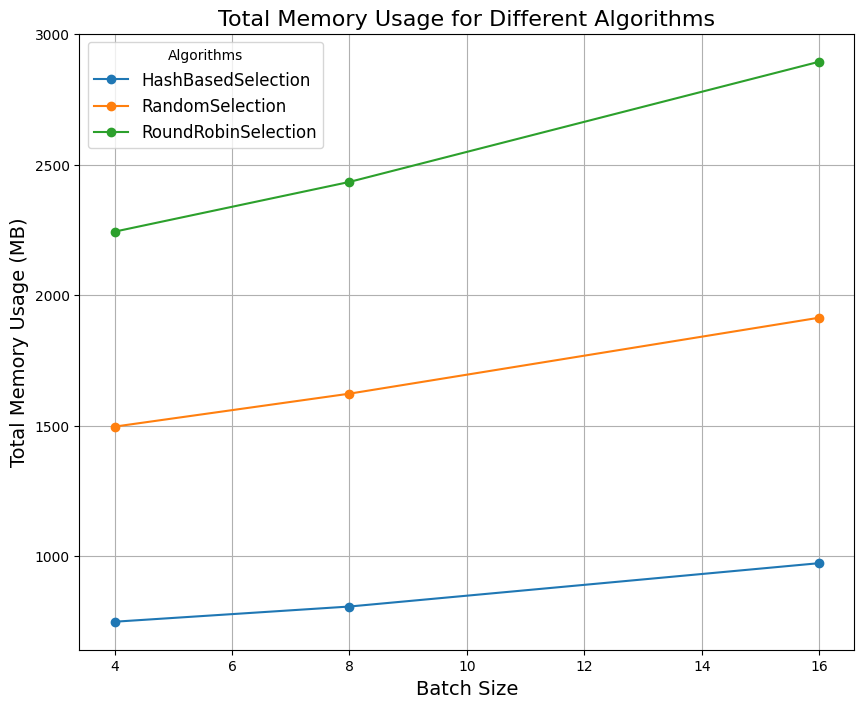

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
alg_data = {}
for i, data in enumerate(experiment_data, start=1):
    alg_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        memory_usage = [result['batch_info'][0]['memory_used'] for result in entry['results']]
        average_memory_usage = sum(memory_usage) / len(memory_usage)
        alg_data[i][batch_size] = average_memory_usage

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each actor's batch size vs inference time
for alg, data in alg_data.items():
    batch_sizes = sorted(data.keys())
    memory_usage = [data[bs]*alg for bs in batch_sizes]
    ax.plot(batch_sizes, memory_usage, marker='o', label=f'{algo_names[alg-1]}')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Total Memory Usage (MB)', fontsize=14)
ax.set_title('Total Memory Usage for Different Algorithms', fontsize=16)
ax.legend(title="Algorithms", fontsize=12)
plt.grid(True)
plt.show()


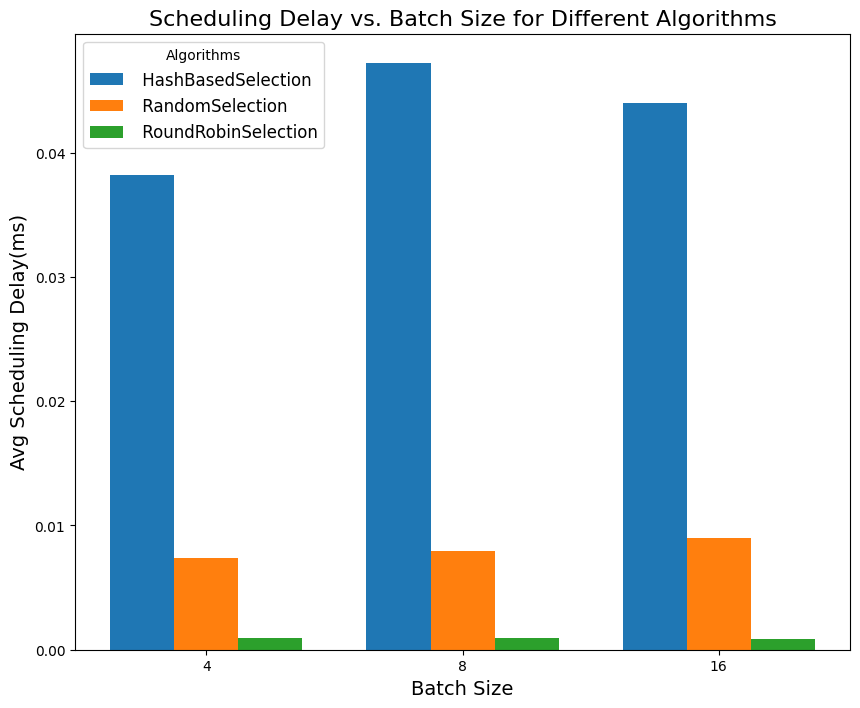

In [12]:
alg_data = {}
for i, data in enumerate(experiment_data, start=1):
    alg_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        inference_time = [result['batch_info'][0]['scheduled_delay'] for result in entry['results']]
        average_inference_time = sum(inference_time) / len(inference_time)
        alg_data[i][batch_size] = average_inference_time

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

# Define the width of the bars
width = 0.25  # Width of each bar

# Plotting each actor's batch size vs inference time
batch_sizes = sorted(alg_data[1].keys())  # Get the sorted list of batch sizes
n_groups = len(batch_sizes)  # Number of groups per actor
index = np.arange(n_groups)  # Array with the number of batch sizes

for i, (actor, data) in enumerate(alg_data.items()):
    inference_time = [data[bs] for bs in batch_sizes]
    ax.bar(index + i * width, inference_time, width, label=f' {algo_names[actor-1]}')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Avg Scheduling Delay(ms)', fontsize=14)
ax.set_title('Scheduling Delay vs. Batch Size for Different Algorithms', fontsize=16)
ax.set_xticks(index + width)
ax.set_xticklabels(batch_sizes)
ax.legend(title="Algorithms", fontsize=12)

plt.savefig('plots/mem1.png')

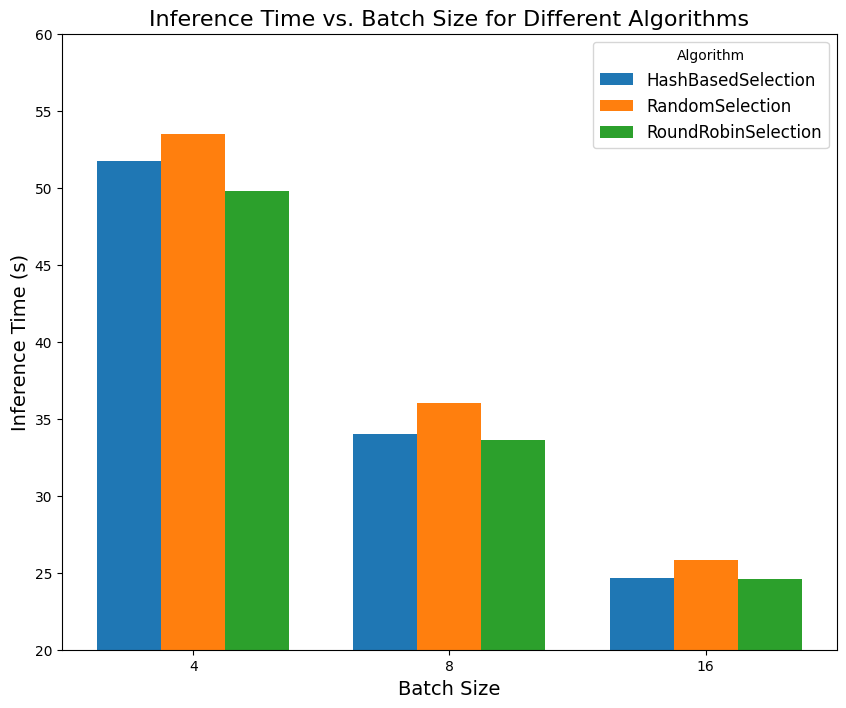

In [13]:
# Prepare data for plotting total times
total_time_data = {}
for i, data in enumerate(experiment_data, start=1):
    total_time_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        total_time = entry['total_time']
        total_time_data[i][batch_size] = total_time

# Create plots for total time comparison
fig, ax = plt.subplots(figsize=(10, 8))

# Define the width of the bars
width = 0.25  # Width of each bar

# Sort batch sizes and plot each actor's data as a separate bar group
batch_sizes = sorted(total_time_data[1].keys())
n_groups = len(batch_sizes)
index = np.arange(n_groups)  # Array with the number of batch sizes

for i, (actor, data) in enumerate(total_time_data.items()):
    total_times = [data[bs] for bs in batch_sizes]
    ax.bar(index + i * width, total_times, width, label=f'{algo_names[actor-1]}')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Inference Time (s)', fontsize=14)
ax.set_title('Inference Time vs. Batch Size for Different Algorithms', fontsize=16)
ax.set_xticks(index + width / 2 * (len(total_time_data) - 1))
ax.set_xticklabels(batch_sizes)
ax.legend(title="Algorithm", fontsize=12)
ax.set_ylim([20, 60])  # Set y-axis limits
# plt.grid(True)
plt.savefig('plots/mem2.png')

In [14]:
# to be implemented
# comparing schdeuling algorithms
# sample run of another model
# design demo for the project